In [1]:
import cv2 as cv
import numpy as np
from numpy.core.umath_tests import inner1d
from matplotlib import pyplot as plt

/var/folders/f0/ppx936m13zg00wzyly6p2lr00000gn/T/ipykernel_5384/703855581.py:3: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
patch_1 = cv.imread("data/patch_samples/patch_map_1.png")
patch_2 = cv.imread("data/patch_samples/patch_map_2.png")
patch_3 = cv.imread("data/patch_samples/patch_map_3.png")
patch_4 = cv.imread("data/patch_samples/patch_map_4.png")

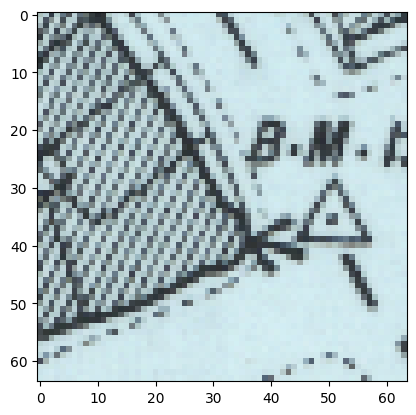

In [4]:
fig, ax = plt.subplots()
ax.imshow(patch_1)
plt.show()

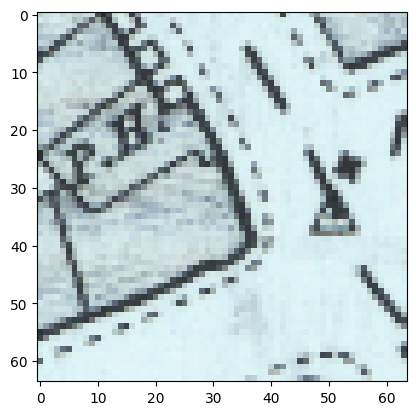

In [5]:
fig, ax = plt.subplots()
ax.imshow(patch_2)
plt.show()

In [6]:
print(patch_1.shape)
print(patch_2.shape)

(64, 64, 3)
(64, 64, 3)


In [7]:
def padding_and_tresh_patch(patch,padding_size,threshold):
    img = cv.cvtColor(patch, cv.COLOR_BGR2GRAY)
    ret,img = cv.threshold(img, threshold, 255,cv.THRESH_BINARY)
    img = cv.copyMakeBorder(img, padding_size, padding_size, padding_size, padding_size, cv.BORDER_CONSTANT, value=(255,255,255))
    return img

def show(image):
    plt.imshow(image)
    plt.show()
    
def shift(image,x,y):
    M = np.float32([[1, 0, x], [0, 1, y]])
    #x>0 shift right，x<0 shift left
    #y>0 shift down，y<0 move up
    shifted = cv.warpAffine(image, M, (image.shape[1], image.shape[0]),borderValue=(255))
    return shifted

# a list of all possible shift values
def creat_shift_list(padding_size):
    values = []
    for i in range(-padding_size,padding_size+1):
        for j in range(-padding_size,padding_size+1):
            values.append((i,j))
    return values

## img1 is the img we want to aligned, img 2 is the reference image.
def find_best_shift_value(img1,img2,shift_list):
    best_shift = (0,0)
    xor_sum = np.logical_xor(img1, img2).sum()
    smallest_xor = xor_sum
    for shift_value in shift_list:
        ##shift the image
        res = shift(img1,shift_value[0],shift_value[1])
        xor = np.logical_xor(res, img2).sum()
        if xor<smallest_xor:
            best_shift = shift_value
            smallest_xor = xor
    return best_shift

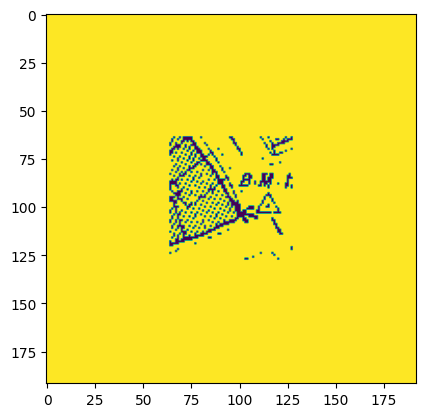

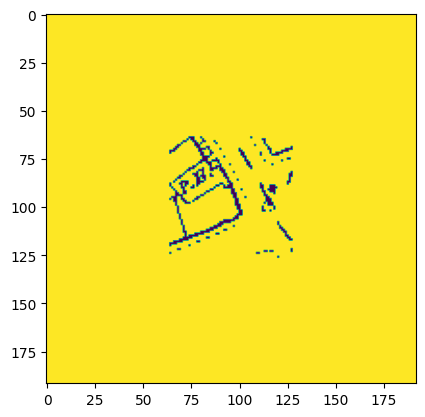

In [9]:
## padding size is the size we want to expand the image
## threshold : pixel value > threshold = 255 white
# pixel value < threshold = 0 black

img1 = padding_and_tresh_patch(patch_1,64,120)
img2 = padding_and_tresh_patch(patch_2,64,120)
show(img1)
show(img2)

In [10]:
#before alignment ,the pixel difference is 
np.logical_xor(img1, img2).sum()

845

In [11]:
def find_twopatches_alignment(patch1,patch2,padding_size,threshold):
    img1 = padding_and_tresh_patch(patch1,padding_size,threshold)
    img2 = padding_and_tresh_patch(patch2,padding_size,threshold)
    shift_value_list = creat_shift_list(padding_size)
    best_shift_value = find_best_shift_value(img1,img2,shift_value_list)
    return best_shift_value
    

In [12]:
print(find_twopatches_alignment(patch_1,patch_2,16,120))

(0, 0)


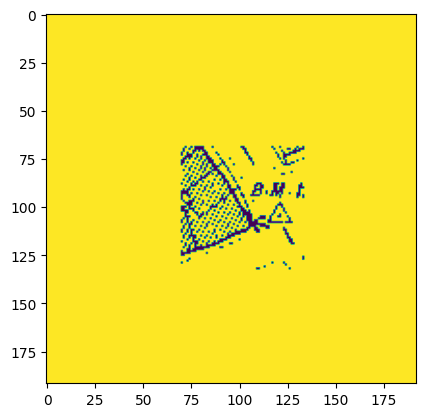

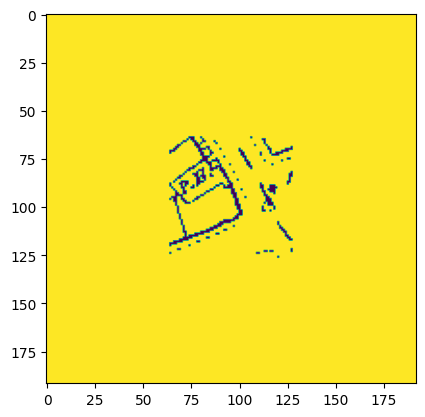

In [13]:
show(shift(img1,6,5))
show(img2)